# Utils
## Base functions

In [1]:
def identity(x):
  return x

## Image utils

Please install : py-opencv

### Read & display images

In [2]:
# imread read images in RGB
from imageio import imread

def img_read(img_path):
    return imread(img_path)

In [3]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html
import numpy as np
import cv2

# cv2 read images in BGR
def img_read_cv(img_path, color_mode=cv2.IMREAD_COLOR):
    # cv2.IMREAD_UNCHANGED (-1) | cv2.IMREAD_GRAYSCALE (0) | cv2.IMREAD_COLOR (default : 1)
    img = cv2.imread(img_path, color_mode)
    return img

# change BGR to RGB
def img_convert_color(img, color_mode=cv2.COLOR_BGR2RGB):
    # https://www.ccoderun.ca/programming/doxygen/opencv/group__imgproc__color__conversions.html
    img = cv2.cvtColor(img, color_mode)
    return img

In [4]:
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
# https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow
from matplotlib import pyplot as plt

def img_show(img, func=identity):
    plt.imshow(func(img))
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

def img_show_using_color(img, color_map='gray'):
    # https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html
    # IT DOESN'T CHANGE the color map, it INTERPRETS IT
    plt.imshow(img, cmap=color_map)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()    

## Face detection

* More info for classifer at https://www.superdatascience.com/blogs/opencv-face-detection
* More info for OpenCV modules at https://docs.opencv.org/3.4.1/modules.html

In [5]:
import cv2

haarcascade_dir = '../cascades/haarcascades/'
cascade_frontalface_alt2 = cv2.CascadeClassifier(haarcascade_dir + 'haarcascade_frontalface_alt2.xml')

def detect_faces(img, scale_factor=1.1, min_neighbors=5, coordinate_mapper=None, cascade=cascade_frontalface_alt2):
    faces = cascade.detectMultiScale(img,
                                     scaleFactor=scale_factor,
                                     minNeighbors=min_neighbors)
    print('Faces found: ', len(faces))
    if (coordinate_mapper == None):
        return faces
    
    face_collector = []
    for (x, y, w, h) in faces:
        face_collector.append(coordinate_mapper(img, x, y, w, h))

    return face_collector

In [6]:
margin=0

def extract_face_mapper(img, x, y, w, h):
    cropped = img[y-margin//2:y+h+margin//2,
                  x-margin//2:x+w+margin//2, :]
    return cropped

def highlight_face_mapper(img, x, y, w, h):
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Tests

In [7]:
img_path = '../data/faces/elon_musk.jpeg'

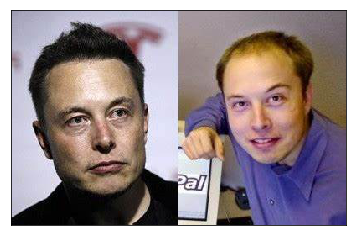

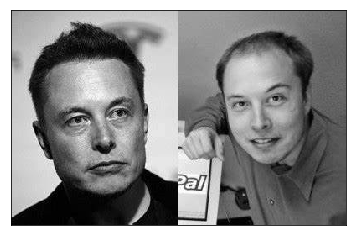

In [8]:
# READ COLOR
img = img_read_cv(img_path)
img = img_convert_color(img)
img_show(img)

# READ GRAYSCALE
img = img_read_cv(img_path, cv2.IMREAD_GRAYSCALE)
img_show_using_color(img, 'gray')

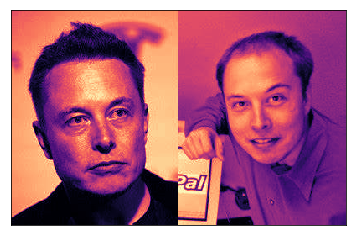

In [9]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_colorspaces/py_colorspaces.html
img = img_read_cv(img_path)
img = img_convert_color(img, cv2.COLOR_BGR2GRAY)
img_show_using_color(img, 'magma')

Faces found:  2


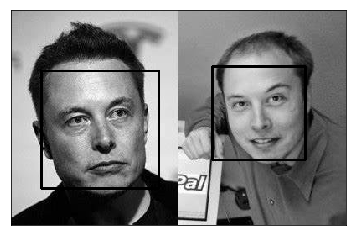

In [10]:
# IMREAD_GRAYSCALE is more resource efficient
img = img_read_cv(img_path, cv2.IMREAD_GRAYSCALE)

detect_faces(img, coordinate_mapper=highlight_face_mapper)
img_show_using_color(img, 'gray')

Faces found:  2
(110, 110, 3)


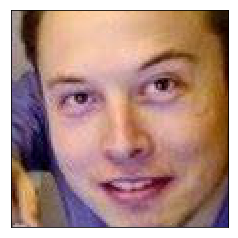

(144, 144, 3)


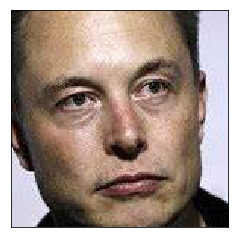

In [11]:
img = img_read(img_path)

face_images = detect_faces(img, coordinate_mapper=extract_face_mapper)
for img in face_images:
    print(img.shape)
    img_show(img)

Faces found:  4
(28, 28, 3)


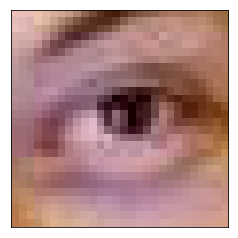

(26, 26, 3)


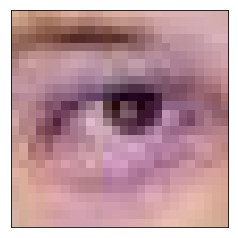

(31, 31, 3)


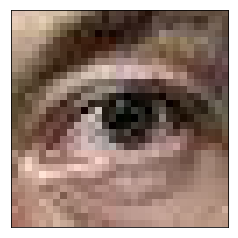

(37, 37, 3)


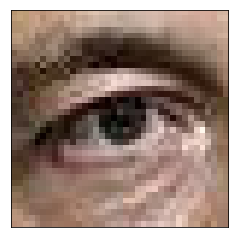

In [12]:
img = img_read(img_path)

cascade_eye = cv2.CascadeClassifier(haarcascade_dir + 'haarcascade_eye.xml')

face_images = detect_faces(img, coordinate_mapper=extract_face_mapper, cascade=cascade_eye)
for img in face_images:
    print(img.shape)
    img_show(img)